In [12]:
# coding:utf-8 
import pylab 
import imageio 
import skimage 
import pandas as pd
import numpy as np 
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
  
#path of the video 
filename = 'videos/1a_amcrest.mp4'
frames_to_cut = 60
model_input = (224,224)
im_list = []
vid = imageio.get_reader(filename, 'ffmpeg') 
for num,im in enumerate(vid): 

    if num % frames_to_cut == 0:
        image = skimage.img_as_float(im).astype(np.float64) 
        image = cv2.resize(image, model_input)
        if(image.max() > 2):
            image = image / 255.0
        
        im_list.append(image)
        

im_list = np.array(im_list)

In [14]:
model = load_model('MobileNet-Edged-Unfrozen/best_model.h5')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [23]:
prediction_mapping = {0: 'Lying', 1: 'Sitting', 2: 'Standing'}
prediction = model.predict(im_list)
result = np.argmax(prediction, axis = 1)

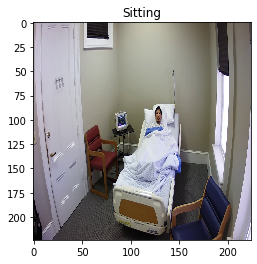

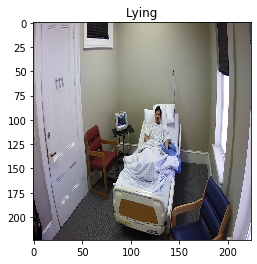

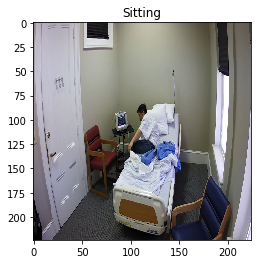

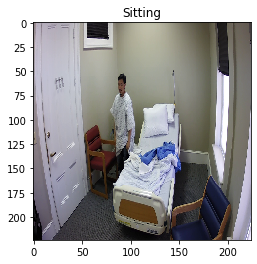

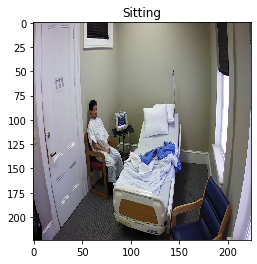

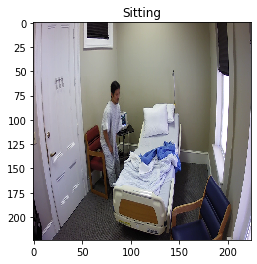

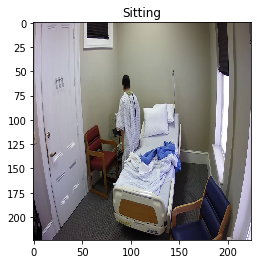

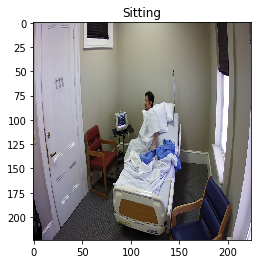

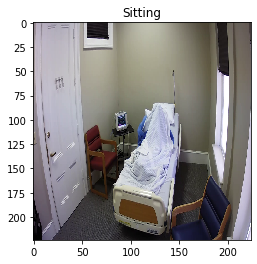

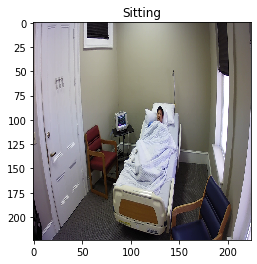

In [33]:
for i in range(len(result)):
    plt.subplots()
    plt.title(prediction_mapping[result[i]])
    plt.imshow(im_list[i])